# Project 1: NCAA Basketball

## Introduction
What follows is an analysis of a network generated by the 2016-2017 NCAA Division 1 basketball season. The network is generated by definining the nodes as teams who made the NCAA Tournament with directed edges depicting the outcome of games played in the season prior to the NCAA Tournament. The weights of the edges are the margin of victory with the edge directed to the winning team. If a team beat another twice, the weight is the total margin of victory.

There is a great deal of effort put into creating a visualization of this network.

The main question of interest is how this network can be used to predict the outcome of games in the 2017 NCAA Tournament. I compare rankings based on total victories, total margin of victory, PageRank, Random Walks, and Eigenvector Centrality to the actual results of the tournament, and the rankings given by the selection committee.

The base of the data can be found at https://github.com/brianckeegan/NCAA-MBB-2017/blob/master/tournament_schedule.gexf. However, errors were detected and so some information had to be corrected or ammended.

## Methods
Below is a running description of the analysis performed.

The first cell consists of importing the packages and data, and creating dictionaries for use later on.

This cell can be hidden.

In [123]:
#Importing the necessary packages
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import math
from numpy.linalg import matrix_power as mp
import matplotlib as mpl
from networkx.algorithms.community import greedy_modularity_communities as mod_com
from networkx.algorithms.community import performance
import scipy
from scipy.cluster import hierarchy
import itertools
from networkx.algorithms.community import girvan_newman
from networkx.algorithms.components import number_connected_components
from random import shuffle
from statistics import mean
import copy

G=nx.DiGraph() #creating the graph
#Adding the nodes. These are the teams which made the tournament. Teams who did not play another team in the field are omitted.
G.add_node('Dayton')
G.add_node('Winthrop')
G.add_node('Gonzaga')
G.add_node('Marquette')
G.add_node('RI')
G.add_node('Oregon')
G.add_node('Purdue')
G.add_node('Xavier')
G.add_node('TX South')
G.add_node('N KY')
G.add_node('Arkansas')
G.add_node('VA Tech')
G.add_node('Princeton')
G.add_node('Michigan')
G.add_node('Florida')
G.add_node('FL St')
G.add_node('SC')
G.add_node('Seton Hall')
G.add_node('Cinci')
G.add_node('Bucknell')
G.add_node('ETSU')
G.add_node('FGCU')
G.add_node('NCW')
G.add_node('W St')
G.add_node('WV')
G.add_node('Iona')
G.add_node('Virginia')
G.add_node('Arizona')
G.add_node('Nevada')
G.add_node('Jack St')
G.add_node('ND')
G.add_node('WI')
G.add_node('Duke')
G.add_node('Vermont')
G.add_node('UCLA')
G.add_node('Kentucky')
G.add_node('Vill')
G.add_node('VCU')
G.add_node('MN')
G.add_node('UNC')
G.add_node('Miami')
G.add_node('MI St')
G.add_node('OK St')
G.add_node('Kansas')
G.add_node('Creighton')
G.add_node('IA St')
G.add_node('SD St')
G.add_node('NW')
G.add_node('Mid TN')
G.add_node('St Marys')
G.add_node('Vand')
G.add_node('Butler')
G.add_node('Louis')
G.add_node('SMU')
G.add_node('Maryland')
G.add_node('Baylor')
G.add_node('KS St')
G.add_node('Wake F')
G.add_node('Mt SM')
G.add_node('New Or')
G.add_node('Prov')
G.add_node('USC')
G.add_node('Troy')
G.add_node('NCC')
#Ignoring the Teams that had not played anyone
#G.add_node('NM St')
#G.add_node('Kent St')
#G.add_node('NDak')
#G.add_node('UC Davis')

#Adding the edges. This data was input and checked by hand after errors were found in the original data.
#edges from losing team to winning team
#weights are margin of victory
G.add_edge('Winthrop','Dayton', weight=16)
G.add_edge('RI','Dayton', weight=4)
G.add_edge('Vand','Dayton', weight=5)
G.add_edge('Winthrop','FL St', weight=14)
G.add_edge('Arizona','Gonzaga', weight=7)
G.add_edge('St Marys','Gonzaga', weight=51)
G.add_edge('Florida','Gonzaga', weight=5)
G.add_edge('IA St','Gonzaga', weight=2)
G.add_edge('Creighton','Marquette', weight=16)
G.add_edge('Seton Hall','Marquette', weight=3)
G.add_edge('Vill','Marquette', weight=2)
G.add_edge('Vand','Marquette', weight=24)
G.add_edge('Xavier','Marquette', weight=33)
G.add_edge('Cinci','RI', weight=5)
G.add_edge('UCLA','Oregon', weight=2)
G.add_edge('Arizona','Oregon', weight=27)
G.add_edge('MI St','Purdue', weight=28)
G.add_edge('ND','Purdue', weight=5)
G.add_edge('NW','Purdue', weight=25)
G.add_edge('WI','Purdue', weight=11)
G.add_edge('Maryland','Purdue', weight=1)
G.add_edge('Seton Hall','Xavier', weight=2)
G.add_edge('Creighton','Xavier', weight=2)
G.add_edge('Butler','Xavier', weight=5)
G.add_edge('TX South','Louis', weight=31)
G.add_edge('Vand','Arkansas', weight=15)
G.add_edge('SC','Arkansas', weight=7)
G.add_edge('Virginia','VA Tech', weight=2)
G.add_edge('Michigan','VA Tech', weight=3)
G.add_edge('Miami','VA Tech', weight=5)
G.add_edge('Duke','VA Tech', weight=14)
G.add_edge('Bucknell','Princeton', weight=2)
G.add_edge('MI St','Michigan', weight=29)
G.add_edge('Purdue','Michigan', weight=16)
G.add_edge('Marquette','Michigan', weight=18)
G.add_edge('Michigan','UCLA', weight=18)
G.add_edge('WI','Michigan', weight=21)
G.add_edge('MN','Michigan', weight=7)
G.add_edge('Miami','Florida', weight=9)
G.add_edge('Seton Hall','Florida', weight=5)
G.add_edge('FGCU','Florida', weight=21)
G.add_edge('SC','Florida', weight=15)
G.add_edge('Kentucky','Florida', weight=22)
G.add_edge('Arkansas','Florida', weight=22)
G.add_edge('Virginia','FL St', weight=2)
G.add_edge('Florida','FL St', weight=5)
G.add_edge('Miami','FL St', weight=27)
G.add_edge('Louis','FL St', weight=5)
G.add_edge('Duke','FL St', weight=16)
G.add_edge('ND','FL St', weight=3)
G.add_edge('VA Tech','FL St', weight=21)
G.add_edge('Iona','FL St', weight=21)
G.add_edge('MN','FL St', weight=8)
G.add_edge('Vermont','SC', weight=18)
G.add_edge('Michigan','SC', weight=15)
G.add_edge('Florida','SC', weight=4)
G.add_edge('Marquette','Seton Hall', weight=9)
G.add_edge('Butler','Seton Hall', weight=6)
G.add_edge('Xavier','Seton Hall', weight=7)
G.add_edge('Creighton','Seton Hall', weight=6)
G.add_edge('SC','Seton Hall', weight=3)
G.add_edge('Xavier','Cinci', weight=8)
G.add_edge('IA St','Cinci', weight=1)
G.add_edge('TX South','Cinci', weight=38)
G.add_edge('Vand','Bucknell', weight=3)
G.add_edge('SD St','ETSU', weight=12)
G.add_edge('SD St','W St', weight=22)
G.add_edge('Virginia','WV', weight=9)
G.add_edge('OK St','WV', weight=17)
G.add_edge('Kansas','WV', weight=16)
G.add_edge('IA St','WV', weight=24)
G.add_edge('Baylor','WV', weight=21)
G.add_edge('N KY','WV', weight=31)
G.add_edge('Iona','Nevada', weight=2)
G.add_edge('Louis','Virginia', weight=24)
G.add_edge('ND','Virginia', weight=17)
G.add_edge('VA Tech','Virginia', weight=23)
G.add_edge('UNC','Virginia', weight=10)
G.add_edge('Oregon','Arizona', weight=3)
G.add_edge('MI St','Arizona', weight=2)
G.add_edge('UCLA','Arizona', weight=22)
G.add_edge('TX South','Arizona', weight=22)
G.add_edge('Louis','ND', weight=7)
G.add_edge('FL St','ND', weight=16)
G.add_edge('Miami','ND', weight=5)
G.add_edge('NW','ND', weight=4)
G.add_edge('VA Tech','ND', weight=5)
G.add_edge('Virginia','ND', weight=13)
G.add_edge('Marquette','WI', weight=9)
G.add_edge('Maryland','WI', weight=11)
G.add_edge('Michigan','WI', weight=4)
G.add_edge('NW','WI', weight=28)
G.add_edge('MN','WI', weight=19)
G.add_edge('Miami','Duke', weight=12)
G.add_edge('MI St','Duke', weight=9)
G.add_edge('Louis','Duke', weight=4)
G.add_edge('Florida','Duke', weight=10)
G.add_edge('FL St','Duke', weight=5)
G.add_edge('Virginia','Duke', weight=10)
G.add_edge('RI','Duke', weight=10)
G.add_edge('ND','Duke', weight=16)
G.add_edge('UNC','Duke', weight=8)
G.add_edge('Oregon','UCLA', weight=3)
G.add_edge('Kentucky','UCLA', weight=5)
G.add_edge('Arizona','UCLA', weight=5)
G.add_edge('Michigan','UCLA', weight=18)
G.add_edge('MI St','Kentucky', weight=21)
G.add_edge('Arkansas','Kentucky', weight=43)
G.add_edge('Florida','Kentucky', weight=10)
G.add_edge('Vand','Kentucky', weight=12)
G.add_edge('SC','Kentucky', weight=16)
G.add_edge('UNC','Kentucky', weight=3)
G.add_edge('Virginia','Vill', weight=2)
G.add_edge('Purdue','Vill', weight=3)
G.add_edge('Xavier','Vill', weight=41)
G.add_edge('Creighton','Vill', weight=26)
G.add_edge('Marquette','Vill', weight=12)
G.add_edge('ND','Vill', weight=8)
G.add_edge('Seton Hall','Vill', weight=54)
G.add_edge('Mid TN','VCU', weight=3)
G.add_edge('Princeton','VCU', weight=11)
G.add_edge('Dayton','VCU', weight=5)
G.add_edge('Purdue','MN', weight=9)
G.add_edge('Michigan','MN', weight=5)
G.add_edge('Maryland','MN', weight=14)
G.add_edge('NW','MN', weight=4)
G.add_edge('Arkansas','MN', weight=14)
G.add_edge('MI St','MN', weight=5)
G.add_edge('Vand','MN', weight=4)
G.add_edge('Virginia','UNC', weight=24)
G.add_edge('Miami','UNC', weight=25)
G.add_edge('FL St','UNC', weight=13)
G.add_edge('Louis','UNC', weight=11)
G.add_edge('ND','UNC', weight=7)
G.add_edge('VA Tech','UNC', weight=19)
G.add_edge('WI','UNC', weight=15)
G.add_edge('Duke','UNC', weight=7)
G.add_edge('UNC','Miami', weight=15)
G.add_edge('Virginia','Miami', weight=6)
G.add_edge('VA Tech','Miami', weight=6)
G.add_edge('Duke','Miami', weight=5)
G.add_edge('Michigan','MI St', weight=8)
G.add_edge('FGCU','MI St', weight=1)
G.add_edge('NW','MI St', weight=9)
G.add_edge('W St','MI St', weight=5)
G.add_edge('WI','MI St', weight=10)
G.add_edge('MN','MI St', weight=19)
G.add_edge('Arkansas','OK St', weight=28)
G.add_edge('WV','OK St', weight=7)
G.add_edge('W St','OK St', weight=17)
G.add_edge('OK St','Kansas', weight=12)
G.add_edge('IA St','Kansas', weight=4)
G.add_edge('Baylor','Kansas', weight=7)
G.add_edge('WV','Kansas', weight=4)
G.add_edge('Kentucky','Kansas', weight=6)
G.add_edge('Duke','Kansas', weight=2)
G.add_edge('Marquette','Creighton', weight=8)
G.add_edge('Seton Hall','Creighton', weight=14)
G.add_edge('Xavier','Creighton', weight=18)
G.add_edge('WI','Creighton', weight=12)
G.add_edge('Butler','Creighton', weight=20)
G.add_edge('Miami','IA St', weight=17)
G.add_edge('WV','IA St', weight=6)
G.add_edge('OK St','IA St', weight=22)
G.add_edge('Kansas','IA St', weight=3)
G.add_edge('Baylor','IA St', weight=3)
G.add_edge('Maryland','NW', weight=8)
G.add_edge('Michigan','NW', weight=2)
G.add_edge('WI','NW', weight=7)
G.add_edge('Dayton','NW', weight=3)
G.add_edge('NCW','Mid TN', weight=5)
G.add_edge('Vand','Mid TN', weight=23)
G.add_edge('Nevada','St Marys', weight=18)
G.add_edge('Dayton','St Marys', weight=4)
G.add_edge('Arkansas','Vand', weight=13)
G.add_edge('Florida','Vand', weight=14)
G.add_edge('IA St','Vand', weight=6)
G.add_edge('SC','Vand', weight=9)
G.add_edge('Iona','Nevada', weight=15)
G.add_edge('Bucknell','Butler', weight=26)
G.add_edge('Vermont','Butler', weight=12)
G.add_edge('Seton Hall','Butler', weight=7)
G.add_edge('Arizona','Butler', weight=4)
G.add_edge('Xavier','Butler', weight=14)
G.add_edge('Marquette','Butler', weight=11)
G.add_edge('NW','Butler', weight=2)
G.add_edge('Cinci','Butler', weight=10)
G.add_edge('Vand','Butler', weight=10)
G.add_edge('Vill','Butler', weight=16)
G.add_edge('Miami','Louis', weight=5)
G.add_edge('Purdue','Louis', weight=7)
G.add_edge('ND','Louis', weight=7)
G.add_edge('Kentucky','Louis', weight=3)
G.add_edge('W St','Louis', weight=10)
G.add_edge('VA Tech','Louis', weight=4)
G.add_edge('Duke','Louis', weight=9)
G.add_edge('Cinci','SMU', weight=24)
G.add_edge('MI St','Maryland', weight=3)
G.add_edge('OK St','Maryland', weight=1)
G.add_edge('Michigan','Maryland', weight=7)
G.add_edge('Jack St','Maryland', weight=26)
G.add_edge('NW','Maryland', weight=10)
G.add_edge('MN','Maryland', weight=7)
G.add_edge('Oregon','Baylor', weight=17)
G.add_edge('MI St','Baylor', weight=15)
G.add_edge('OK St','Baylor', weight=7)
G.add_edge('IA St','Baylor', weight=2)
G.add_edge('Xavier','Baylor', weight=15)
G.add_edge('FGCU','Baylor', weight=9)
G.add_edge('Louis','Baylor', weight=3)
G.add_edge('WV','Baylor', weight=9)
G.add_edge('TX South','Baylor', weight=26)
G.add_edge('VCU','Baylor', weight=9)
G.add_edge('ETSU','NCW', weight=9)
G.add_edge('ETSU','Dayton', weight=14)
G.add_edge('SMU','Cinci', weight=2)
G.add_edge('VCU','RI', weight=17)
G.add_edge('KS St','Maryland', weight=1)
G.add_edge('KS St','IA St', weight=13)
G.add_edge('KS St','WV', weight=20)
G.add_edge('WV','KS St', weight=4)
G.add_edge('OK St','KS St', weight=8)
G.add_edge('KS St','OK St', weight=12)
G.add_edge('KS St','Kansas', weight=5)
G.add_edge('Baylor','KS St', weight=8)
G.add_edge('KS St','Baylor', weight=9)
G.add_edge('Bucknell','Wake F', weight=20)
G.add_edge('Wake F','Vill', weight=19)
G.add_edge('Wake F','NW', weight=7)
G.add_edge('Wake F','Xavier', weight=4)
G.add_edge('Wake F','FL St', weight=16)
G.add_edge('Wake F','Virginia', weight=17)
G.add_edge('Wake F','UNC', weight=6)
G.add_edge('Miami','Wake F', weight=17)
G.add_edge('Wake F','Duke', weight=7)
G.add_edge('Wake F','ND', weight=7)
G.add_edge('Louis','Wake F', weight=7)
G.add_edge('VA Tech','Wake F', weight=14)
G.add_edge('Mt SM','WV', weight=28)
G.add_edge('Mt SM','IA St', weight=18)
G.add_edge('Mt SM','MN', weight=24)
G.add_edge('Mt SM','Michigan', weight=17)
G.add_edge('Mt SM','Arkansas', weight=13)
G.add_edge('Mt SM','Bucknell', weight=16)
G.add_edge('New Or','OK St', weight=45)
G.add_edge('New Or','USC', weight=34)
G.add_edge('New Or','NW', weight=33)
G.add_edge('N KY','NCC', weight=8)
G.add_edge('Vermont','Prov', weight=22)
G.add_edge('Prov','Virginia', weight=11)
G.add_edge('RI','Prov', weight=3)
G.add_edge('Prov','Xavier', weight=26)
G.add_edge('Prov','Butler', weight=17)
G.add_edge('Prov','Creighton', weight=26)
G.add_edge('Xavier','Prov', weight=12)
G.add_edge('Butler','Prov', weight=6)
G.add_edge('Creighton','Prov', weight=2)
G.add_edge('Seton Hall','Prov', weight=4)
G.add_edge('Prov','Seton Hall', weight=2)
G.add_edge('Prov','Vill', weight=19)
G.add_edge('Marquette','Prov', weight=5)
G.add_edge('SMU','USC', weight=5)
G.add_edge('Troy','USC', weight=5)
G.add_edge('USC','Oregon', weight=34)
G.add_edge('USC','Arizona', weight=20)
G.add_edge('UCLA','USC', weight=8)
G.add_edge('USC','UCLA', weight=34)

#Creating a node dictionary for later use
node_dict={'Dayton':0,'Winthrop':1,'Gonzaga':2,'Marquette':3,'RI':4,'Oregon':5,'Purdue':6,
           'Xavier':7,'TX South':8,'N KY':9,'Arkansas':10, 'VA Tech':11, 'Princeton':12,
           'Michigan':13, 'Florida':14, 'FL St':15, 'SC':16, 'Seton Hall':17, 'Cinci':18,
           'Bucknell':19, 'ETSU':20, 'FGCU':21, 'NCW':22, 'W St':23, 'WV':24, 'Iona':25,
           'Virginia':26, 'Arizona':27, 'Nevada':28, 'Jack St':29, 'ND':30, 'WI':31, 'Duke':32,
           'Vermont':33, 'UCLA':34, 'Kentucky':35, 'Vill':36, 'VCU':37, 'MN':38, 'UNC':39,
           'Miami':40, 'MI St':41, 'OK St':42, 'Kansas':43, 'Creighton':44, 'IA St':45,
           'SD St':46, 'NW':47, 'Mid TN':48, 'St Marys':49, 'Vand':50, 'Butler':51, 'Louis':52,
           'SMU':53, 'Maryland':54, 'Baylor':55, 'KS St':56, 'Wake F':57, 'Mt SM':58, 'New Or':59,
           'Prov':60, 'USC':61, 'Troy':62, 'NCC':63}

node_dict_rev=dict((v, k) for k, v in node_dict.items()) #dictionary for later use

#Creating a dictionary for the seed given to each team by the selection committee
seed_dict={'Dayton':7,'Winthrop':13,'Gonzaga':1,'Marquette':10,'RI':11,'Oregon':3,'Purdue':4,
           'Xavier':11,'TX South':16,'N KY':15,'Arkansas':8, 'VA Tech':9, 'Princeton':12,
           'Michigan':7, 'Florida':4, 'FL St':3, 'SC':7, 'Seton Hall':9, 'Cinci':6,
           'Bucknell':13, 'ETSU':13, 'FGCU':14, 'NCW':12, 'W St':10, 'WV':4, 'Iona':14,
           'Virginia':5, 'Arizona':2, 'Nevada':12, 'Jack St':15, 'ND':5, 'WI':8, 'Duke':2,
           'Vermont':13, 'UCLA':3, 'Kentucky':2, 'Vill':1, 'VCU':10, 'MN':5, 'UNC':1,
           'Miami':8, 'MI St':9, 'OK St':10, 'Kansas':1, 'Creighton':6, 'IA St':5,
           'SD St':16, 'NW':8, 'Mid TN':12, 'St Marys':7, 'Vand':9, 'Butler':4, 'Louis':2,
           'SMU':6, 'Maryland':6, 'Baylor':3, 'KS St':11, 'Wake F':11, 'Mt SM':16, 'New Or':16,
           'Prov':11, 'USC':11, 'Troy':15, 'NCC':16}

#Creating the dictionary "chalk" which ranks the teams by seed for later use. The four 1-seeds needed to be rearranged.
dict2=seed_dict.copy()
chalk=sorted(dict2, key=dict2.get, reverse=True)
chalk[-1]='Vill'
chalk[-2]='Kansas'
chalk[-3]='UNC'
chalk[-4]='Gonzaga'

#Creating a dictionary for the games won in the actual tournament for later use
games_won_dict={'Dayton':0,'Winthrop':0,'Gonzaga':5,'Marquette':0,'RI':1,'Oregon':4,'Purdue':2,
           'Xavier':3,'TX South':0,'N KY':0,'Arkansas':1, 'VA Tech':0, 'Princeton':0,
           'Michigan':2, 'Florida':3, 'FL St':1, 'SC':4, 'Seton Hall':0, 'Cinci':1,
           'Bucknell':0, 'ETSU':0, 'FGCU':0, 'NCW':0, 'W St':1, 'WV':2, 'Iona':0,
           'Virginia':1, 'Arizona':2, 'Nevada':0, 'Jack St':0, 'ND':1, 'WI':2, 'Duke':1,
           'Vermont':0, 'UCLA':2, 'Kentucky':3, 'Vill':1, 'VCU':0, 'MN':0, 'UNC':6,
           'Miami':0, 'MI St':1, 'OK St':0, 'Kansas':3, 'Creighton':0, 'IA St':1,
           'SD St':0, 'NW':1, 'Mid TN':1, 'St Marys':1, 'Vand':0, 'Butler':2, 'Louis':1,
           'SMU':0, 'Maryland':0, 'Baylor':2, 'KS St':0, 'Wake F':0, 'Mt SM':0, 'New Or':0,
           'Prov':0, 'USC':1, 'Troy':0, 'NCC':0}

#A list of conferences to which each team belongs
conference_com=[['VA Tech','UNC','FL St','ND','Louis','Virginia','Duke','Miami', 'Wake F'], #0 ACC
                ['Oregon','Arizona','UCLA', 'USC'], #1 PAC 12
                ['Marquette','Vill','Butler','Creighton','Seton Hall','Xavier', 'Prov'], #2 BIG EAST
                ['WV','Kansas', 'IA St', 'Baylor', 'OK St', 'KS St'], #3 BIG 12
                ['Purdue', 'Maryland', 'WI', 'MN', 'MI St', 'NW', 'Michigan'], #4 BIG 10
                ['Arkansas','Kentucky','Florida','SC', 'Vand'], #5 SEC
                ['Dayton','RI','VCU'], #6 Atlantic 10
                ['Winthrop'], #7
                ['St Marys','Gonzaga'], #8 West Coast Conference
                ['TX South'], #9
                ['N KY'], #10
                ['Princeton'], #11
                ['Cinci','SMU'], #12
                ['Bucknell'], #13
                ['ETSU'], #14
                ['FGCU'], #15
                ['NCW'], #16
                ['W St'], #17
                ['Iona'], #18
                ['Nevada'], #19
                ['Jack St'], #20
                ['Vermont'], #21
                ['SD St'], #22
                ['Mid TN'], #23
                ['Mt SM'], #24
                ['New Or'], #25
                ['Troy'], #26
                ['NCC']] #27

#Creates lists of teams for later use
major_conf_teams=[]
for i in range(6):
    for team in conference_com[i]:
        major_conf_teams.append(team)
small_teams=[]
for i in range(6,28):
    for team in conference_com[i]:
        small_teams.append(team)
major_conferences=[]
for i in range(6):
    major_conferences.append(conference_com[i])
small_conferences=[]
for i in range(6,28):
    small_conferences.append(conference_com[i])

#Next is creating a function that computes the number of "Madness Points" earned, given a specific ranking of teams and scoring system
def list_to_dict(ordered_list):
    ranking_dict={}
    k=0
    for team in ordered_list:
        d={team:k}
        ranking_dict.update(d)
        k+=1
    return ranking_dict

def madness_points(values, system=[1,2,4,8,16,32]):
    if type(values) == dict:
        d=values
    if type(values) == list or type(values) == np.ndarray:
        d=list_to_dict(values)
    p=0
    #Round 1, East
    k=system[0]
    if d['Vill']>d['Mt SM'] and d['Vill']>d['New Or']:
        p+=k
    if d['WI']>d['VA Tech']:
        p+=k
    if d['Virginia']>d['NCW']:
        p+=k
    if d['Florida']>d['ETSU']:
        p+=k
    if d['USC']>d['SMU'] or d['Prov']>d['SMU']:
        p+=k
    if d['Baylor']>0:
        p+=k
    if d['SC']>d['Marquette']:
        p+=k
    if d['Duke']>d['Troy']:
        p+=k
    #Round 1, West
    if d['Gonzaga']>d['SD St']:
        p+=k
    if d['NW']>d['Vand']:
        p+=k
    if d['ND']>d['Princeton']:
        p+=k
    if d['WV']>d['Bucknell']:
        p+=k
    if d['Xavier']>d['Maryland']:
        p+=k
    if d['FL St']>d['FGCU']:
        p+=k
    if d['St Marys']>d['VCU']:
        p+=k
    if d['Arizona']>0:
        p+=k
    #Round 1, Midwest
    if d['Kansas']>d['NCC']:
        p+=k
    if d['MI St']>d['Miami']:
        p+=k
    if d['IA St']>d['Nevada']:
        p+=k
    if d['Purdue']>d['Vermont']:
        p+=k
    if d['RI']>d['Creighton']:
        p+=k
    if d['Oregon']>d['Iona']:
        p+=k
    if d['Michigan']>d['OK St']:
        p+=k
    if d['Louis']>d['Jack St']:
        p+=k
    #Round 1, South
    if d['UNC']>d['TX South']:
        p+=k
    if d['Arkansas']>d['Seton Hall']:
        p+=k
    if d['Mid TN']>d['MN']:
        p+=k
    if d['Butler']>d['Winthrop']:
        p+=k
    if d['Cinci']>d['KS St'] and d['Cinci']>d['Wake F']:
        p+=k
    if d['UCLA']>0:
        p+=k
    if d['W St']>d['Dayton']:
        p+=k
    if d['Kentucky']>d['N KY']:
        p+=k
    
    #Round 2, East
    k=system[1]
    if d['WI']>max(d['Vill'],d['VA Tech'],d['Mt SM'],d['New Or']):
        p+=k
    if d['Florida']>max(d['Virginia'],d['ETSU'],d['NCW']):
        p+=k
    if d['Baylor']>max(d['USC'],d['SMU'],d['Prov']):
        p+=k
    if d['SC']>max(d['Duke'],d['Marquette'],d['Troy']):
        p+=k
        
    #Round 2, West
    if d['Gonzaga']>max(d['NW'],d['SD St'],d['Vand']):
        p+=k
    if d['WV']>max(d['ND'],d['Bucknell'],d['Princeton']):
        p+=k
    if d['Xavier']>max(d['FL St'],d['Maryland'],d['FGCU']):
        p+=k
    if d['Arizona']>max(d['St Marys'],d['VCU']):
        p+=k
        
        
    #Round 2, Midwest    
    if d['Kansas']>max(d['MI St'],d['NCC'],d['Miami']):
        p+=k
    if d['Purdue']>max(d['IA St'],d['Vermont'],d['Nevada']):
        p+=k
    if d['Oregon']>max(d['RI'],d['Iona'],d['Creighton']):
        p+=k
    if d['Michigan']>max(d['Louis'],d['OK St'],d['Jack St']):
        p+=k

    #Round 2, South 
    if d['UNC']>max(d['Arkansas'],d['TX South'],d['Seton Hall']):
        p+=k
    if d['Butler']>max(d['Mid TN'],d['Winthrop'],d['MN']):
        p+=k
    if d['UCLA']>max(d['Cinci'],d['KS St'],d['Wake F']):
        p+=k
    if d['Kentucky']>max(d['W St'],d['N KY'],d['Dayton']):
        p+=k
        
    #Elite 8, East
    k=system[2]
    if d['Florida']>max(d['WI'],d['Vill'],d['Mt SM'],d['New Or'],d['VA Tech'],d['Virginia'],d['NCW'],d['ETSU']):
        p+=k
    if d['SC']>max(d['SMU'],d['USC'],d['Prov'],d['Baylor'],d['Marquette'],d['Duke'],d['Troy']):
        p+=k
    
    #Elite 8, West
    if d['Gonzaga']>max(d['SD St'],d['NW'],d['Vand'],d['ND'],d['Princeton'],d['WV'],d['Bucknell']):
        p+=k
    if d['Xavier']>max(d['Maryland'],d['FL St'],d['FGCU'],d['St Marys'],d['VCU'],d['Arizona']):
        p+=k
    
    #Elite 8, Midwest
    if d['Kansas']>max(d['NCC'],d['Miami'],d['MI St'],d['IA St'],d['Nevada'],d['Purdue'],d['Vermont']):
        p+=k
    if d['Oregon']>max(d['Creighton'],d['RI'],d['Iona'],d['Michigan'],d['OK St'],d['Louis'],d['Jack St']):
        p+=k
    
    #Elite 8, South
    if d['UNC']>max(d['TX South'],d['Arkansas'],d['Seton Hall'],d['MN'],d['Mid TN'],d['Butler'],d['Winthrop']):
        p+=k
    if d['Kentucky']>max(d['Cinci'],d['KS St'],d['Wake F'],d['UCLA'],d['Dayton'],d['W St'],d['N KY']):
        p+=k
    
    #Final Four, East
    k=system[3]
    E=max(d['WI'],d['Vill'],d['Mt SM'],d['New Or'],d['VA Tech'],d['Virginia'],d['NCW'],d['ETSU'],
        d['Florida'], d['SMU'],d['USC'],d['Prov'],d['Baylor'],d['Marquette'],d['Duke'],d['Troy'])
    if d['SC']>E:
        p+=k
            
    #Final Four, West
    W=max(d['SD St'],d['NW'],d['Vand'],d['ND'],d['Princeton'],d['WV'],d['Bucknell'],
        d['Xavier'],d['Maryland'],d['FL St'],d['FGCU'],d['St Marys'],d['VCU'],d['Arizona'])
    if d['Gonzaga']>W:
        p+=k
            
    #Final Four, Midwest
    M=max(d['Creighton'],d['RI'],d['Iona'],d['Michigan'],d['OK St'],d['Louis'],d['Jack St'],
        d['Kansas'],d['NCC'],d['Miami'],d['MI St'],d['IA St'],d['Nevada'],d['Purdue'],d['Vermont'])
    if d['Oregon']>M: 
        p+=k
            
    #Final Four, South
    S=max(d['TX South'],d['Arkansas'],d['Seton Hall'],d['MN'],d['Mid TN'],d['Butler'],d['Winthrop'],
        d['Kentucky'],d['Cinci'],d['KS St'],d['Wake F'],d['UCLA'],d['Dayton'],d['W St'],d['N KY'])
    if d['UNC']>S:
        p+=k
        
    #National Championship Contenders
    k=system[4]
    if d['UNC']>max(S,d['Oregon'],M):
        p+=k
    if d['Gonzaga']>max(W,d['SC'],E):
        p+=k
        
    #Title Winner:
    if d['UNC']>max(S,d['Oregon'],M,W,d['SC'],E,d['Gonzaga']):
        p+=system[5]
        
    return p

#This function prints a round by round breakdown of how a specific team ranking performs
def round_breakdown(ranking, system=[1,2,4,8,16,32]):
    for i in range(1,7):
        zeros=np.zeros(6)
        zeros[i-1]=1
        print('Round', i, ':', madness_points(ranking,system=zeros))
    print('Total Points:', madness_points(ranking,system=system))

### Visualization
This section is dedicated to creating an optimal visualization for the network.

First, one notices that inside the major 6 conferences, (ACC, PAC12, BIG EAST, BIG12, BIG10, SEC), there are k-cliques formed, as every team plays every other team in the conference. Also, the majority of the teams who played several other teams in the tournament come from the major 6 conferences.

With this knowledge and after some experimentation, I decided it was best to layout the network with a modified shell layout with the 6 major conferences in the center, each with a circular layout, and all the other conferences in an outer shell.

I colored the nodes and edges by conference, with non-conference edges colored grey.

The size of the nodes represent the seed the team was given by the selection committee, with higher seeded teams, (the favorites) appearing larger.

The width of the edges represent the margin of victory in the game, with larger wins translating to thicker edges.

The following cell produces an visualization of the network with that layout.

In [153]:
def draw_basic(G,com_list):
    pos_list=[]
    pos_master={}
    num_com=len(com_list)
    
    #20 visually distinct colors
    color_list=['#e6194B', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#42d4f4', '#f032e6',
                '#bfef45', '#fabebe', '#469990', '#e6beff', '#9A6324', '#fffac8', '#800000', '#aaffc3',
                '#808000', '#ffd8b1', '#e60075', '#a9a9a9', '#ffffff']
    
    #creating the "community plan graph", which will be the centers of the conferences
    #This is a result of trial and error, subjectively evaluating the beauty and ease to read of the layout
    subgraphs=[]
    for l in com_list:
        subgraphs.append(G.subgraph(l))
    inner=[0,1, 2, 3,4,5] #major 6 conferences
    outer=[6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27] #minor conferences
    com_plan_pos=nx.circular_layout(inner, scale=0.56) #inner circle
    com_plan_pos.update(nx.circular_layout(outer,scale=1)) #outer circle
    
    for i in range(num_com):
        pos=nx.circular_layout(subgraphs[i])
        for n in pos.keys():
            pos[n]=pos[n]*(len(com_list[i])+3)/(1.7*num_com)+com_plan_pos[i] #larger conferences appear larger
        pos_master.update(pos)
        pos_list.append(pos)
    
    plt.figure(figsize=(18,18))
    plt.axis('off')
    
    #size of nodes by seed, again by trial and error
    node_size_list=[]
    for team in list(G.nodes()):
        node_size_list.append((13*(seed_dict[team]-16)*(seed_dict[team]-16)+100))
    
    #width of edges by margin of victory (weight)
    edge_weight_list=[]
    for edges in list(G.edges.data('weight')):
        edge_weight_list.append(edges[2]/10+0.4)
        
    #Drawing all edges. Colors of the conference games will cover the grey edges later
    nx.draw_networkx_edges(G, pos=pos_master, edge_color='grey', alpha=0.6, width=edge_weight_list, node_size=node_size_list, arrowsize=15)
    
    #draw and color the conferences
    for i in range(num_com):
        node_size_list=[]
        for team in list(subgraphs[i].nodes()):
            node_size_list.append((13*(seed_dict[team]-16)*(seed_dict[team]-16)+100))
        edge_weight_list=[]
        for edges in list(subgraphs[i].edges.data('weight')):
            edge_weight_list.append(edges[2]/10+0.4)
        nx.draw_networkx_nodes(subgraphs[i], pos=pos_list[i],node_color=color_list[(i%21)], edgecolors='k', linewidths=0.2, node_size=node_size_list)
        nx.draw_networkx_edges(subgraphs[i], pos=pos_list[i],edge_color=color_list[(i%21)], width=edge_weight_list, alpha=0.9, node_size=node_size_list, arrowsize=15)
        nx.draw_networkx_labels(subgraphs[i], pos=pos_list[i])
    plt.show()
    return pos_master #for use later

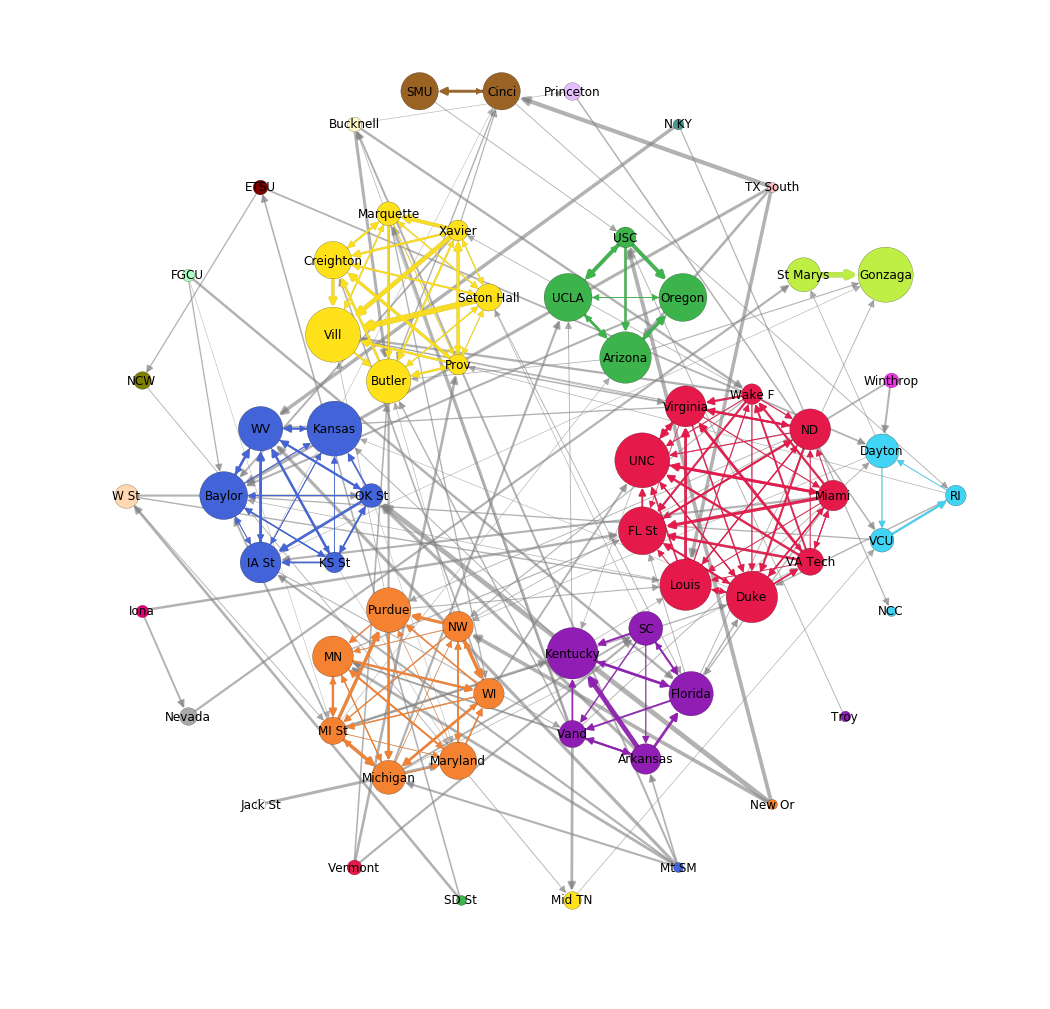

In [154]:
first_layout=draw_basic(G,conference_com)

In order to introduce more clarity, I wanted to minimize the total edge length of the edges within the given structure, the cells below contain my method for doing so.

In [155]:
def dist(p1,p2):
    d=math.sqrt((p1[0]-p2[0])**2+(p1[1]-p2[1])**2)
    return d

def total_edge_length(G,layout):
    total=0
    for edge in G.to_undirected().edges():
        ed=dist(tuple(layout[edge[0]]),tuple(layout[edge[1]]))
        total+=ed
    return total

In [156]:
print('Total Edge Length of First Layout:',total_edge_length(G,first_layout))

Total Edge Length of First Layout: 138.89602315289886


This value is the baseline to improve on.

The first attempt to improve is by randomizing the layout within the desired structure and taking the best layout.

In [157]:
#This function creates a within the desired structure of the major six conferences in the inner shell
#and the minor conferences outside.
def random_layout_within_structure(G,conf_list):
    conf=conf_list.copy()
    for confs in conf:
        shuffle(confs) #Randomizing the order within the conferences
    
    pos_list=[]
    pos_master={}
    num_com=len(conf)

    subgraphs=[]
    for l in conf:
        subgraphs.append(G.subgraph(l))
    com_plan_graph=nx.empty_graph(num_com)
            
    major_confs=[0,1,2,3,4,5] #Major conferences are not shuffled in order to keep space between the conferences by
                                #not having two of the biggest conferences next to each other.
    minor_confs=[6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27]
    shuffle(minor_confs)
    
    com_plan_pos=nx.circular_layout(major_confs, scale=0.56)
    com_plan_pos.update(nx.circular_layout(minor_confs), scale=1)
    
    for i in range(num_com):
        pos=nx.circular_layout(conf[i])
        for n in pos.keys():
            pos[n]=pos[n]*(len(conf[i])+3)/(1.7*num_com)+com_plan_pos[i]
        pos_master.update(pos)
        
    return pos_master

After 10000 trials, the best total edge distance was: 130.61115603251645


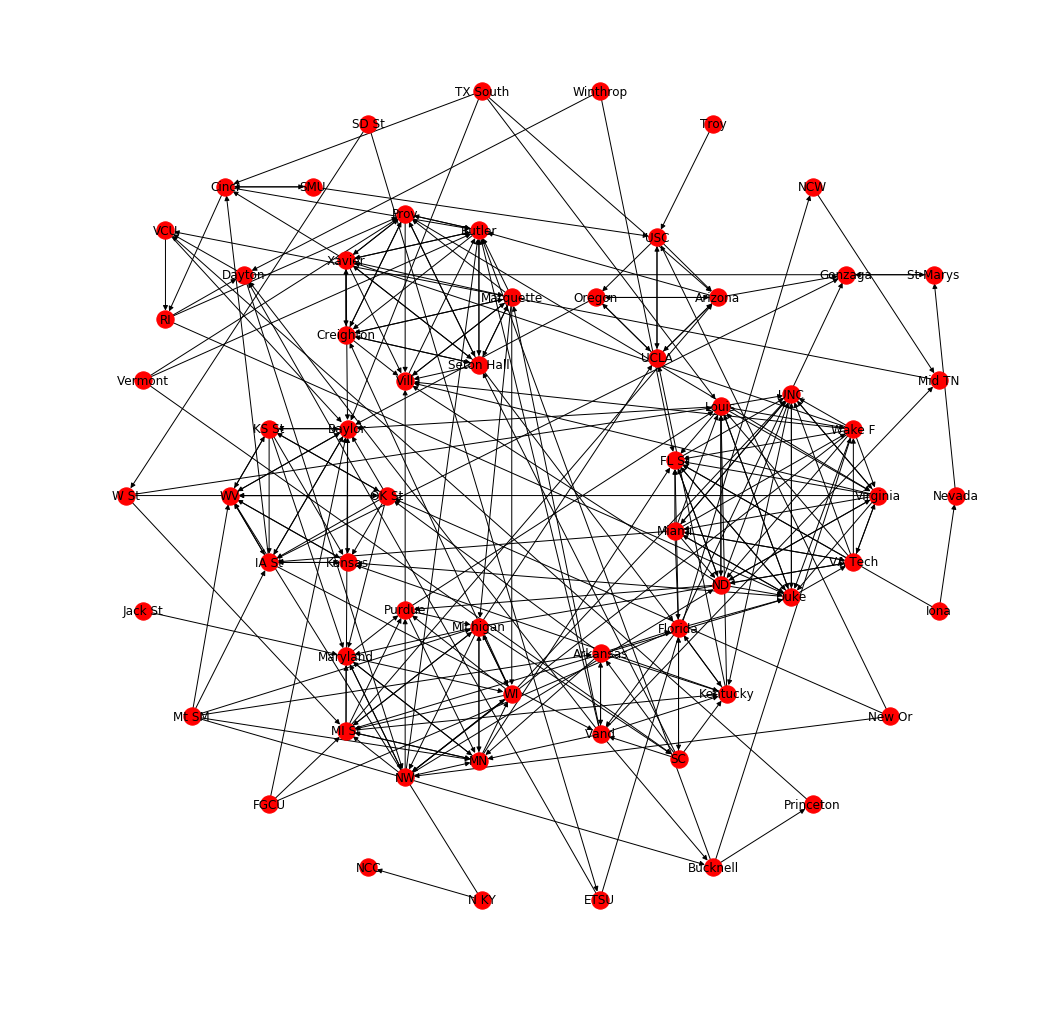

In [94]:
#Complete n trials and return, then plot the best layout. Choice of n made by time constraints.
n=10000
best=138.89 #From first_layout
for i in range(n):
    lay=random_layout_within_structure(G,conference_com)
    score=total_edge_length(G,lay)
    if score<best:
        best=score
        best_lay_after_randomizing=lay.copy()
print('After 10000 trials, the best total edge distance was:',best)
plt.figure(figsize=(18,18))
plt.axis('off')
nx.draw(G, pos=best_lay_after_randomizing, with_labels=True)

In [103]:
#This cell manually scrapes the order of the minor conferences from best_lay_after_randomizing for later use.
minor_order_after_randomizing=[['Nevada'],['Mid TN'],['St Marys','Gonzaga'],['NCW'],['Troy'],['Winthrop'],['TX South'],
                            ['SD St'],['SMU','Cinci'],['Dayton','VCU','RI'],['Vermont'],['W St'],['Jack St'],['Mt SM'],
                            ['FGCU'],['NCC'],['N KY'],['ETSU'],['Bucknell'],['Princeton'],['New Or'],['Iona']]

This is an improvement, but visually still leaves much to be desired.

The cells below perform a systematic way of minimizing edge distance.

In [99]:
#systematically switch inner circle teams
def inner_circle_switches(G,layout,maj_conf_list, maj_team_list):
    updated_layout=layout.copy()
    for team in maj_team_list: #cycle through all teams in the inner circle
        
        for confs in maj_conf_list: #find the potential switches to keep layout structure
            if team in confs:
                potential_switches=confs
                
        for s_team in potential_switches: #test if switching places improves edge distance.
            team_pos=updated_layout[team]
            s_team_pos=updated_layout[s_team]
            test_layout=updated_layout.copy()
            test_layout[team]=s_team_pos
            test_layout[s_team]=team_pos
            if (total_edge_length(G,test_layout)) < (total_edge_length(G,updated_layout)):
                updated_layout=test_layout.copy()
    
    return updated_layout

In [108]:
#create layout given minor conference ordered list
def create_layout_mi_confs(G,layout,maj_conf_list, maj_team_list, mi_confs):
    updated_layout=layout.copy()
    
    #keep the major teams unchanged
    majors_layout={}
    for maj_team in maj_team_list:
        majors_layout.update({maj_team:updated_layout[maj_team]})
    new_layout=majors_layout.copy()
    
    #create outer circle from minor conference ordered list
    subgraphs=[]
    for l in mi_confs:
        subgraphs.append(G.subgraph(l))
    com_plan_graph=nx.empty_graph(len(mi_confs))
    com_plan_pos=nx.circular_layout(com_plan_graph, scale=1)
    
    for i in range(len(mi_confs)):
        pos=nx.circular_layout(subgraphs[i])
        for n in pos.keys():
            pos[n]=pos[n]*(len(mi_confs[i])+3)/(1.7*28)+com_plan_pos[i]
        new_layout.update(pos)
        
    return new_layout

In [158]:
#systematically switch outer conferences
def outer_conference_switches(G,layout,maj_conf_list, maj_team_list, mi_conf):
    mi_confs=mi_conf.copy()
    updated_layout=create_layout_mi_confs(G,layout,maj_conf_list, maj_team_list, mi_confs)
    
    #see if switching conferences helps
    for conf in mi_confs:
        for s_conf in mi_confs:
            test_order=mi_confs.copy()
            a, b = test_order.index(conf), test_order.index(s_conf)
            test_order[b], test_order[a] = test_order[a], test_order[b]
            test_layout=create_layout_mi_confs(G,layout,maj_conf_list, maj_team_list, test_order)
            if (total_edge_length(G,test_layout)) < (total_edge_length(G,updated_layout)):
                updated_lay=test_layout.copy()
                mi_confs=test_order

    return updated_layout, mi_confs

In [159]:
#This function repreatedly looks to switch teams to optimize the layout
def repeatedly_optimize(G,layout,maj_conf_list, maj_team_list, mi_confs):
    new_layout=layout.copy()
    mi_conf=mi_confs.copy()
    for p in range(4):
        for j in range(30):
            new_layout,mi_conf=outer_conference_switches(G,new_layout,major_conferences,major_conf_teams, mi_conf)
        for i in range(4):
            new_layout=inner_circle_switches(G,new_layout,maj_conf_list,maj_team_list)
        print(total_edge_length(G,new_layout))
    plt.figure(figsize=(18,18))
    plt.axis('off')
    nx.draw(G, pos=new_layout, with_labels=True)
    return new_layout

113.56032204731628
112.91558058347968
112.91558058347968
112.91558058347968


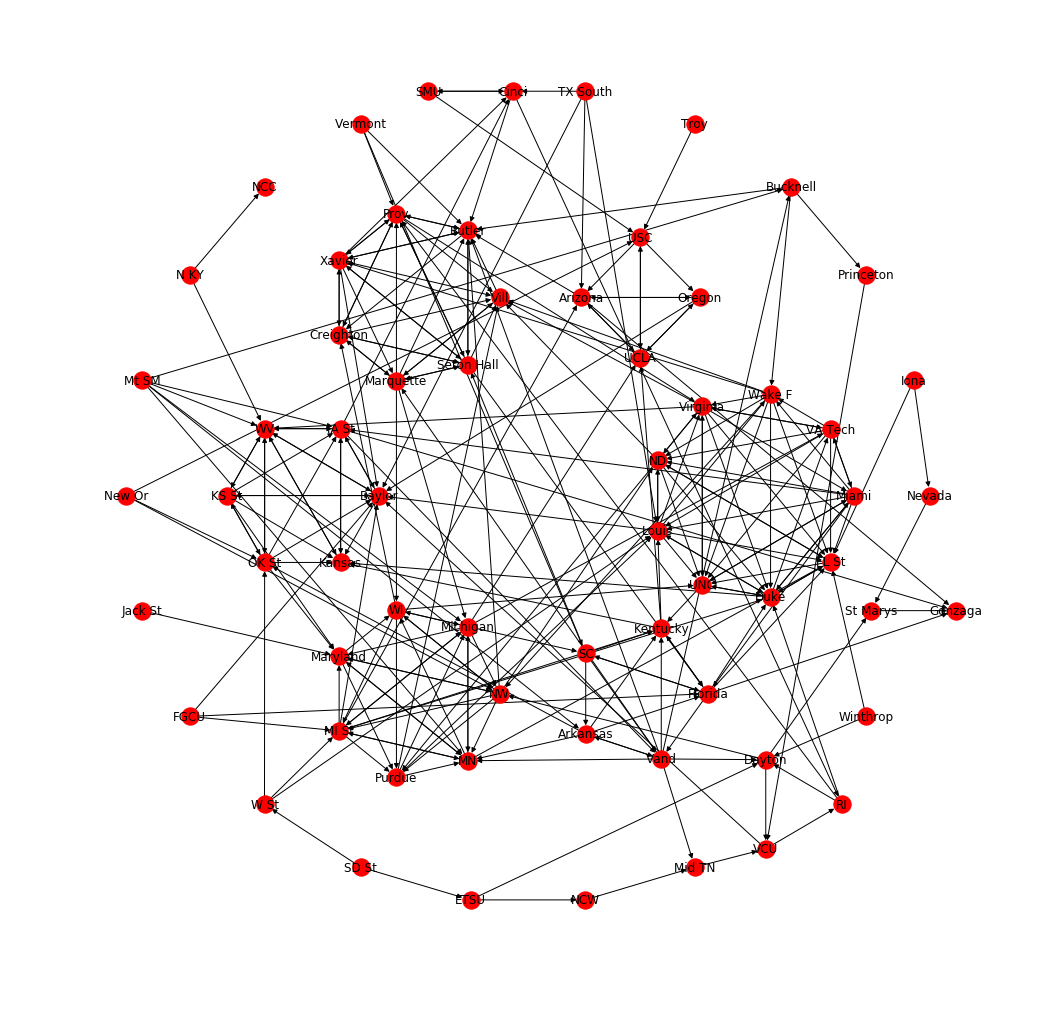

In [125]:
optimized_layout = repeatedly_optimize(G,best_lay_after_randomizing,major_conferences,major_conf_teams,minor_order_after_randomizing)

In [160]:
#after visual inspection the following changes are made in order to make the graph more pleasing.
final_layout=copy.deepcopy(optimized_layout)
#Switch Gonzaga and St Marys
final_layout['Gonzaga'],final_layout['St Marys']=final_layout['St Marys'],final_layout['Gonzaga'] #Switch Gonzaga, St. Marys
#move the ACC up a bit
for team in ['VA Tech','UNC','FL St','ND','Louis','Virginia','Duke','Miami', 'Wake F']:
    final_layout[team]=final_layout[team]+np.array([0,0.01])

The function below uses the optimized layout to draw the best visualization of the graph that I could come up with

In [166]:
def draw_prettiest(G,final_layout, com_list):
    num_com=len(com_list)
    subgraphs=[]
    for l in com_list:
        subgraphs.append(G.subgraph(l))
    
    #20 visually distinct colors
    color_list=['#e6194B', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#42d4f4', '#f032e6',
                '#bfef45', '#fabebe', '#469990', '#e6beff', '#9A6324', '#fffac8', '#800000', '#aaffc3',
                '#808000', '#ffd8b1', '#e60075', '#a9a9a9', '#ffffff']
    
    #size of nodes by seed
    node_size_list=[]
    for team in list(G.nodes()):
        node_size_list.append((13*(seed_dict[team]-16)*(seed_dict[team]-16)+100))
        
    #width of edges by margin of victory (weight)
    edge_weight_list=[]
    for edges in list(G.edges.data('weight')):
        edge_weight_list.append(edges[2]/10+0.4)
        
    plt.figure(figsize=(18,18), dpi=200)
    plt.axis('off')
        
    #Drawing all edges. Colors of the conference games will cover the grey edges later
    nx.draw_networkx_edges(G, pos=final_layout, edge_color='grey', alpha=0.6, width=edge_weight_list, node_size=node_size_list, arrowsize=15)

    for i in range(num_com):
        node_size_list=[]
        for team in list(subgraphs[i].nodes()):
            node_size_list.append((13*(seed_dict[team]-16)*(seed_dict[team]-16)+100))
        edge_weight_list=[]
        for edges in list(subgraphs[i].edges.data('weight')):
            edge_weight_list.append(edges[2]/10+0.4)
        nx.draw_networkx_nodes(subgraphs[i], pos=final_layout,node_color=color_list[(i%21)], edgecolors='k', linewidths=0.2, node_size=node_size_list)
        nx.draw_networkx_edges(subgraphs[i], pos=final_layout,edge_color=color_list[(i%21)], width=edge_weight_list, alpha=0.9, node_size=node_size_list, arrowsize=15)
        nx.draw_networkx_labels(subgraphs[i], pos=final_layout, font_size=13.5)
    #plt.savefig('Final_Visualization')
    plt.show()

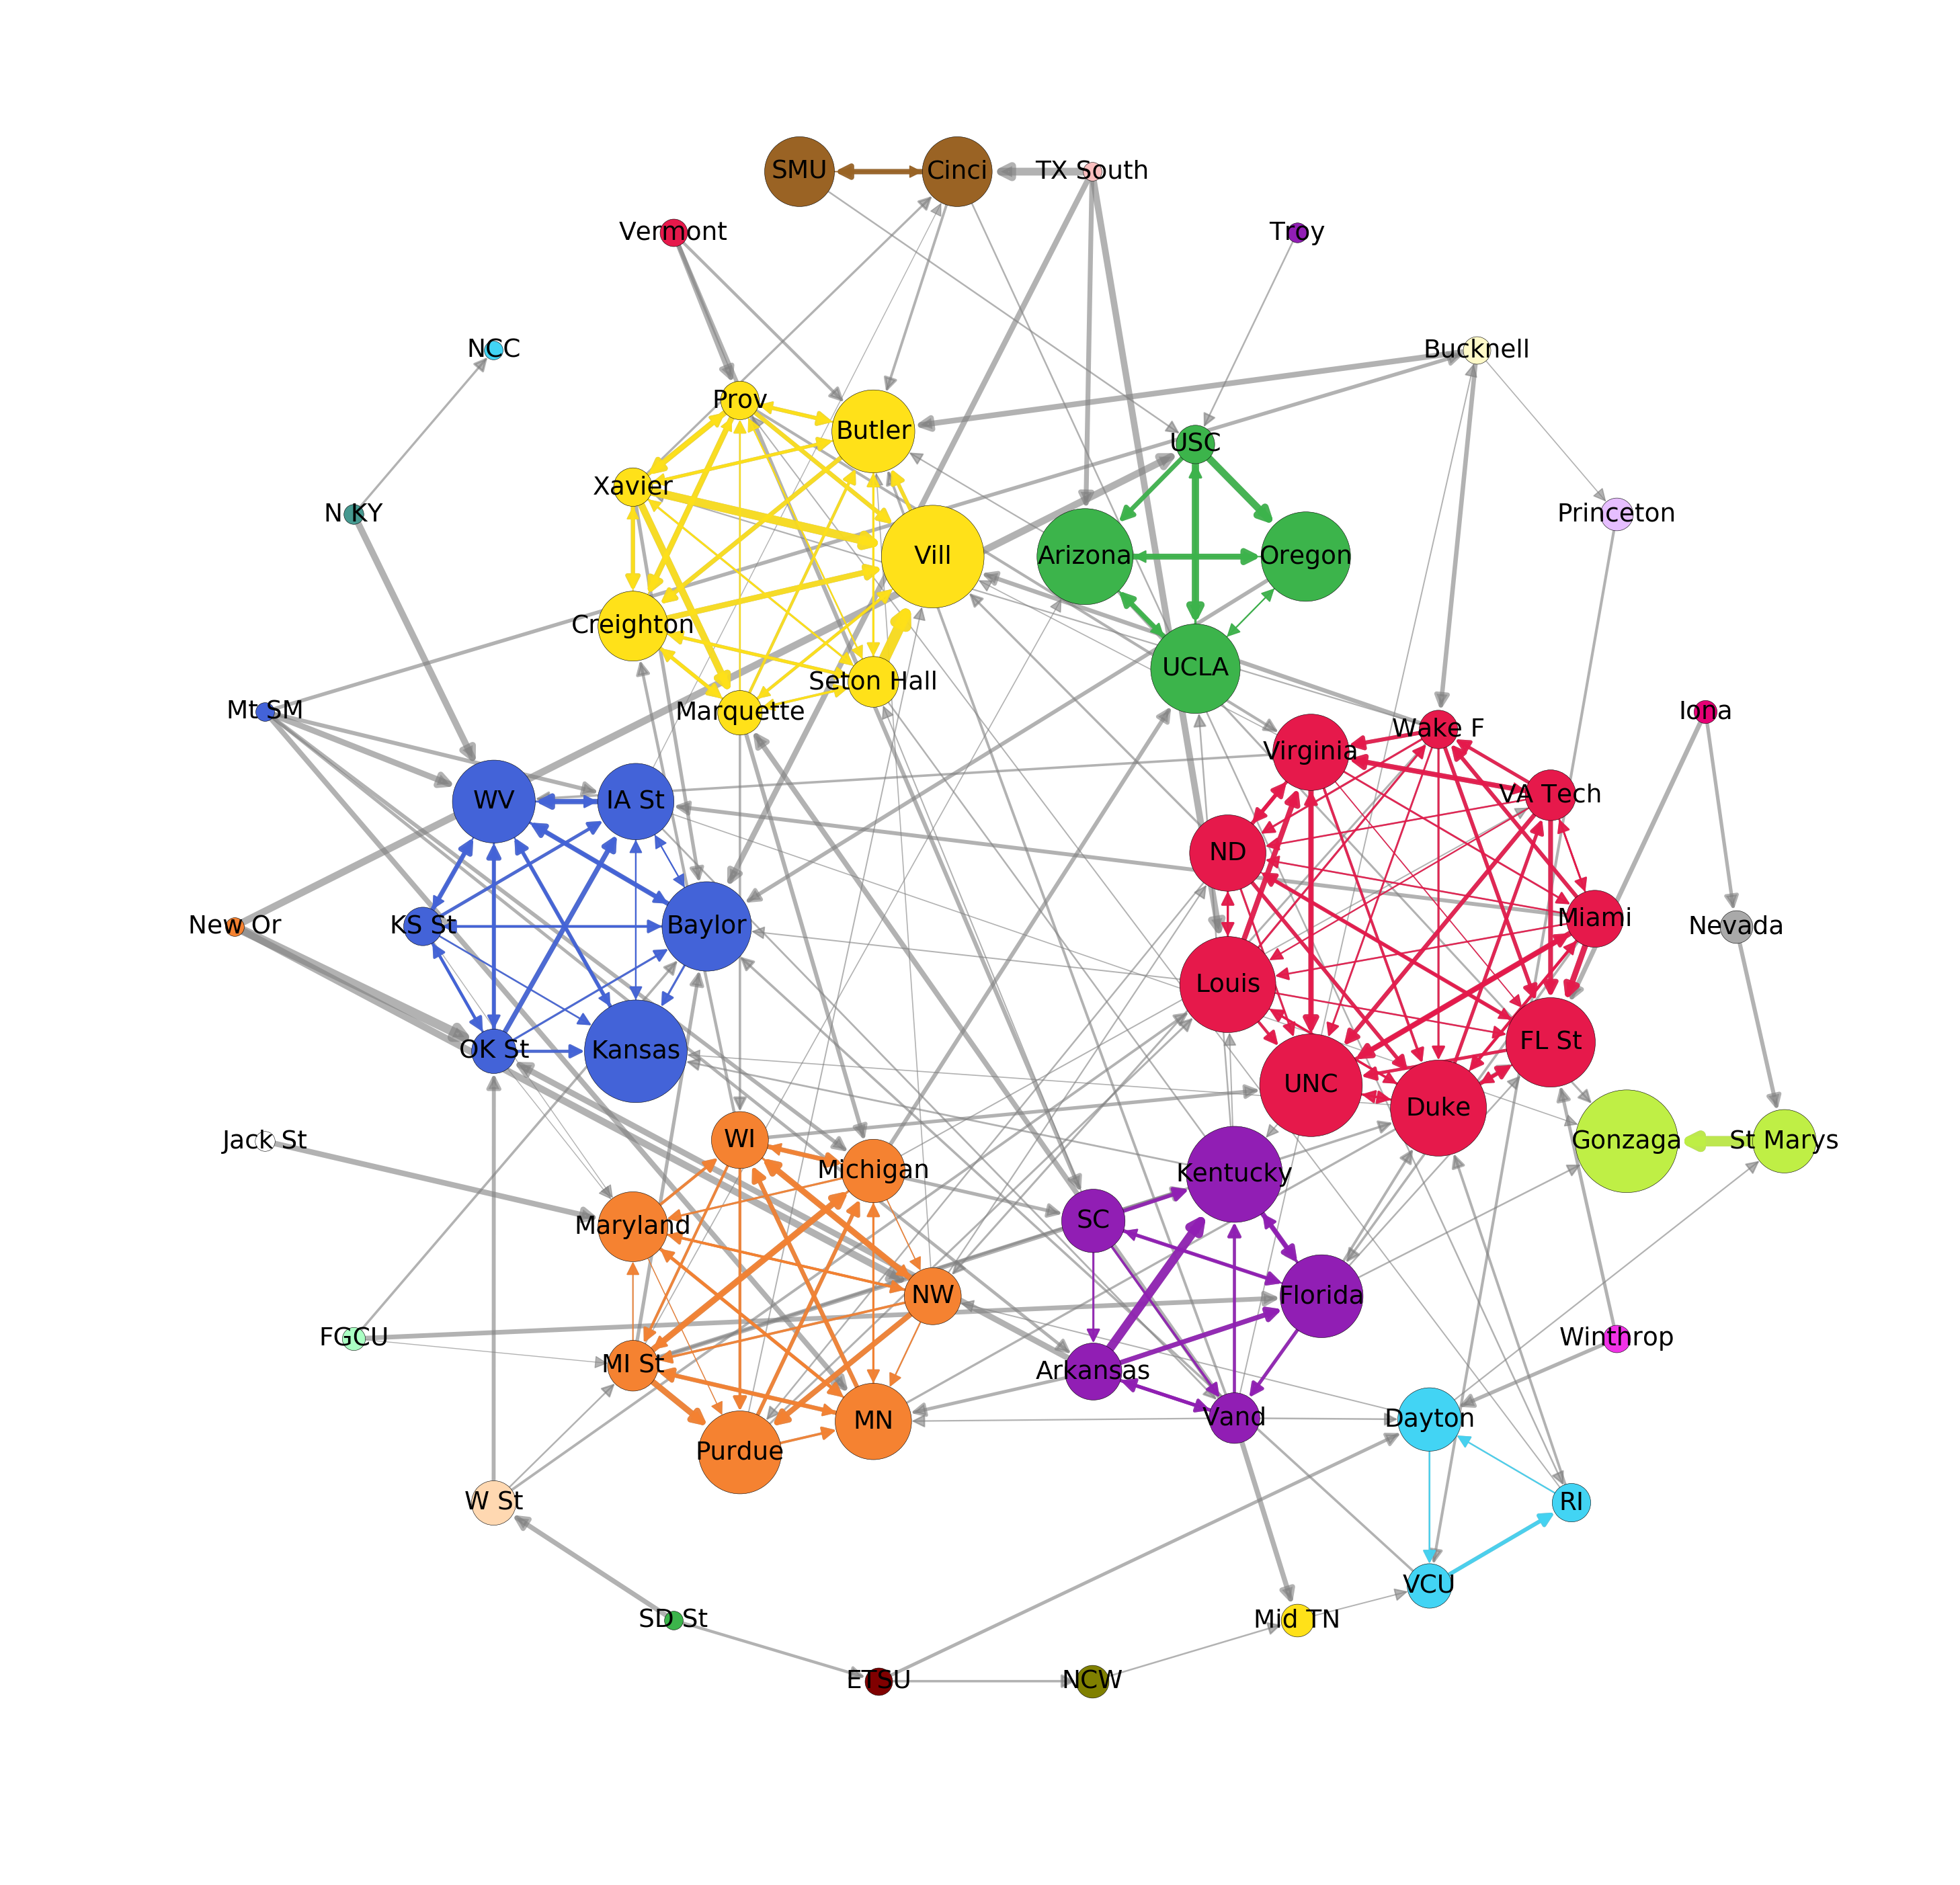

In [165]:
draw_prettiest(G,final_layout,conference_com)

This visualization is pleasing to the eye and contains ample information about the network. I claim that one can easily follow over 90% of the edges from source to destination.

### Predicting Outcomes

This section is dedicated to investing how to use the network to predict outcomes of the 2017 NCAA Tournament

The standard system for awarding madness points is calculated by awarding $2^{n-1}$ points for correctly predicting the winner of a game in the $n^{th}$ round. So each correct prediction in the first round is 1 point, then predicting the national chamption is worth 32 points. Some other scoring systems have been divised, which put less emphesis on predicting the games in the later rounds. Parhaps my personal favorite is the Fibonicci system which awards 1,2,3,5,8, and 13 points for each game in the respective rounds. The majority of the research was done using the standard scoring system.

First, we see the outcomes of known and easy to calculate rankings. The "Chalk" ranking is the ranking given by the selection committee.

In [10]:
total_mov=dict(G.in_degree(weight='weight')) #Calculating total margin of Victory
total_vict=dict(G.in_degree()) #Calculating Total victories (over teams in the tournament)

In [163]:
print('Madness Points for Rankings')
print('Chalk: ', madness_points(chalk))
print('Total Margin of Victory: ', madness_points(total_mov))
print('Total Victories: ', madness_points(total_vict))
print('Random: ', '32') #It is fairly easy to calculate that the expected outcome of a random ranking is 32 points.
print('National Average: ', '65.7') #National average of over 13 million brackets submitted. Data from https://www.ncaa.com/news/basketball-men/2019-02-27/march-madness-how-do-your-past-brackets-stack-competition

Madness Points for Rankings
Chalk:  82
Total Margin of Victory:  45
Total Victories:  44
Random:  32
National Average:  65.7


So we have our benchmarks. If I can use analysis the network to score higher that some of the above scores, I will be successful.

#### PageRank

First, the rankings of the teams is calculated using the built in algorithm. The alpha of "teleportation" probability is set to the default 0.85. Weights of the edges are used.

In [13]:
ranking_default_pagerank=nx.pagerank(G)
print('Madness Points for Default PageRank: ',madness_points(ranking_default_pagerank))

Madness Points for Default PageRank:  38


Well, that's rather disappointing, only slightly better than randomly picking teams. Perhaps altering alpha may help. Perhaps turning the weights off (meaning the margin of victory would irrelevent, a win is simply a win) might help.

Also, perhaps using a different scoring system will make a difference.

The cell below produces plots investigating those questions.

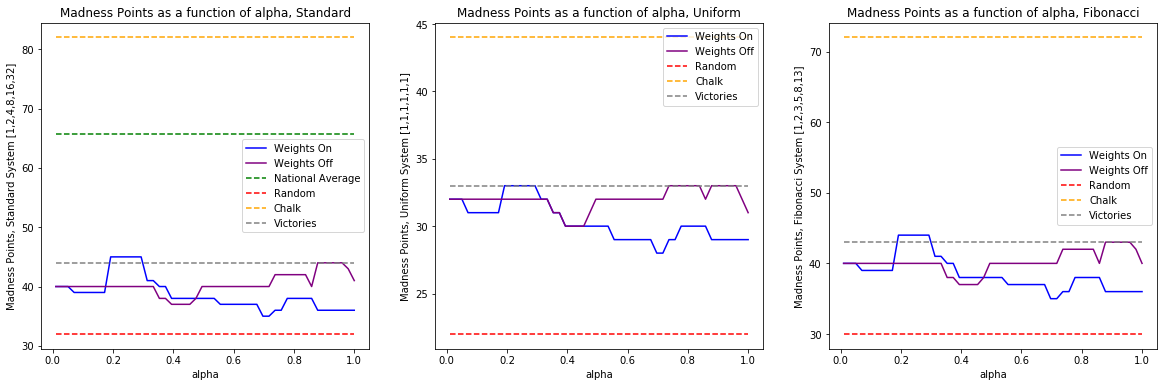

In [32]:
#plotting Madness points as function of alpha in Pagerank for weights on and off
#Average in 2017 was 65.7
#Chalk earns 82 points
#Random ordering of teams earns 32 points
samp=50
x=np.linspace(0.01,1,samp)
y1=np.zeros(samp)
y2=np.zeros(samp)
y3=np.zeros(samp)
y4=np.zeros(samp)
y5=np.zeros(samp)
y6=np.zeros(samp)
AvgS=np.ones(samp)*65.7
RndS=np.ones(samp)*32
ChkS=np.ones(samp)*82
VicS=np.ones(samp)*madness_points(total_vict)

#expected outcomes for random and chalk using other scoring systems
sS=[1,2,4,8,16,32] #Standard System
sU=[1,1,1,1,1,1] #Uniform System
sF=[1,2,3,5,8,13] #Fibonicci System
RndU=np.ones(samp)*22 
ChkU=np.ones(samp)*madness_points(chalk,system=sU)
VicU=np.ones(samp)*madness_points(total_vict,system=sU)
RndF=np.ones(samp)*30
ChkF=np.ones(samp)*madness_points(chalk,system=sF)
VicF=np.ones(samp)*madness_points(total_vict,system=sF)

k=0
for a in x:
    y1[k]=madness_points(nx.pagerank(G, alpha=a))
    y2[k]=madness_points(nx.pagerank(G, alpha=a, weight=None))
    y3[k]=madness_points(nx.pagerank(G, alpha=a), system=sU)
    y4[k]=madness_points(nx.pagerank(G, alpha=a, weight=None), system=sU)
    y5[k]=madness_points(nx.pagerank(G, alpha=a), system=sF)
    y6[k]=madness_points(nx.pagerank(G, alpha=a, weight=None), system=sF)
    k+=1

plt.figure(figsize=(20,6))

plt.subplot(1, 3, 1)
plt.plot(x,y1, color='blue', label='Weights On')
plt.plot(x,y2, color='purple', label='Weights Off')
plt.plot(x, AvgS, color='green', linestyle='dashed', label='National Average')
plt.plot(x, RndS, color='red', linestyle='dashed', label='Random')
plt.plot(x, ChkS, color='orange', linestyle='dashed', label='Chalk')
plt.plot(x, VicS, color='grey', linestyle='dashed', label='Victories')
plt.title('Madness Points as a function of alpha, Standard')
plt.xlabel('alpha')
plt.ylabel('Madness Points, Standard System [1,2,4,8,16,32]')
plt.legend()

plt.subplot(132)
plt.plot(x,y3, color='blue', label='Weights On')
plt.plot(x,y4, color='purple', label='Weights Off')
plt.plot(x, RndU, color='red', linestyle='dashed', label='Random')
plt.plot(x, ChkU, color='orange', linestyle='dashed', label='Chalk')
plt.plot(x, VicU, color='grey', linestyle='dashed', label='Victories')
plt.title('Madness Points as a function of alpha, Uniform')
plt.xlabel('alpha')
plt.ylabel('Madness Points, Uniform System [1,1,1,1,1,1]')
plt.legend()

plt.subplot(133)
plt.plot(x,y5, color='blue', label='Weights On')
plt.plot(x,y6, color='purple', label='Weights Off')
plt.plot(x, RndF, color='red', linestyle='dashed', label='Random')
plt.plot(x, ChkF, color='orange', linestyle='dashed', label='Chalk')
plt.plot(x, VicF, color='grey', linestyle='dashed', label='Victories')
plt.title('Madness Points as a function of alpha, Fibonacci')
plt.xlabel('alpha')
plt.ylabel('Madness Points, Fibonacci System [1,2,3,5,8,13]')
plt.legend()

plt.show()

As we can see, for normal levels of alpha, 0.5 and above, PageRank with weights off outperforms PageRank with weights on.

#### Random Walks

The next method of using the network to predict outcomes will be ranking the teams based on Random Walks.

In [33]:
#Converting adjacency matrix into a transition matrix
def adj_to_trans(adj_mtx):
    s=adj_mtx.shape[0]
    TM=np.zeros((s,s))
    for i in range(s):
        sig=np.sum(adj_mtx,axis=1)[i]
        for j in range(s):
            if (adj_mtx[i,j]>0 and sig!=0):
                TM[i,j]=adj_mtx[i,j]/sig
            if sig==0:
                TM[i,i]=1
    return(TM)

In [34]:
#Creating appropriate matrices
master_adj=nx.to_numpy_matrix(G)
adj_unweighted=nx.to_numpy_matrix(G, weight=None)
master_trans=adj_to_trans(master_adj)
master_trans_unweighted=adj_to_trans(adj_unweighted)

The following cell creates and prints rankings based on random walks, then calculates madness points.

In [36]:
e=np.ones(64)*1/64
t=500
random_walks_vector=np.array([np.matmul(e,mp(master_trans,t))])
random_walks_unweighted_vector=np.array([np.matmul(e,mp(master_trans_unweighted,t))])
rand_walk_rank={}
rand_walk_unweighted_rank={}
for i in range(64):
    d1={node_dict_rev[i]:random_walks_vector[0][i]}
    d2={node_dict_rev[i]:random_walks_unweighted_vector[0][i]}
    rand_walk_rank.update(d1)
    rand_walk_unweighted_rank.update(d2)
print(sorted(rand_walk_rank, key=rand_walk_rank.get, reverse=True))
print()
print(sorted(rand_walk_unweighted_rank, key=rand_walk_unweighted_rank.get, reverse=True))
print()
print('Madness Points for Random Walks, weights on: ', madness_points(rand_walk_rank))
print('Madness Points for Random Walks, weights off: ', madness_points(rand_walk_unweighted_rank))

['Gonzaga', 'NCC', 'WV', 'IA St', 'Baylor', 'Kansas', 'Butler', 'OK St', 'Vill', 'KS St', 'Creighton', 'Marquette', 'UNC', 'Duke', 'Seton Hall', 'Virginia', 'Vand', 'Prov', 'FL St', 'Xavier', 'Miami', 'Michigan', 'ND', 'Florida', 'Kentucky', 'WI', 'UCLA', 'Arizona', 'Louis', 'VA Tech', 'Oregon', 'MN', 'MI St', 'VCU', 'Purdue', 'Maryland', 'Wake F', 'SC', 'Mid TN', 'USC', 'RI', 'Cinci', 'Arkansas', 'NW', 'SMU', 'Dayton', 'St Marys', 'Bucknell', 'Princeton', 'Winthrop', 'TX South', 'N KY', 'ETSU', 'FGCU', 'NCW', 'W St', 'Iona', 'Nevada', 'Jack St', 'Vermont', 'SD St', 'Mt SM', 'New Or', 'Troy']

['Gonzaga', 'NCC', 'Butler', 'IA St', 'WV', 'Kansas', 'Prov', 'Marquette', 'Vill', 'Seton Hall', 'Creighton', 'Baylor', 'Xavier', 'Duke', 'UNC', 'FL St', 'Virginia', 'KS St', 'ND', 'Louis', 'Miami', 'Cinci', 'WI', 'Michigan', 'UCLA', 'OK St', 'Kentucky', 'Maryland', 'MN', 'Florida', 'Arizona', 'VA Tech', 'Vand', 'Purdue', 'Oregon', 'NW', 'MI St', 'USC', 'RI', 'Wake F', 'SMU', 'SC', 'Dayton', 'VCU

Wow! With the weights off, the ranking outperforms the national average!

A couple comments.

First, a quick look at the visualization reveals that there are two "sinks", Gonzaga and North Carolina Central (NCC). Neither team lost to another team who made the tournament. NCC won its only game against another small school, Northern Kentucky. Gonzaga has four wins, including several over larger, highly ranked teams. Knowing this real world information, NCC's ranking is manually set to zero and we run the test again in the cell below.

Secondly, as there is no teleportation probability, Gonzaga ends up with over 90% of the value, which is not ideal. After much experimentation, the cell below shows a method to a ranking that yields a similar number of madness points, but is more balanced, PageRank with $\alpha = 0.8$ and the dangling nodes to Gonzaga.

In [47]:
alt=rand_walk_rank.copy()
alt['NCC']=0 #manually setting NCC to zero
print('Madness Points of Altered Random Walks, weights on:', madness_points(alt))
alt2=rand_walk_unweighted_rank.copy()
alt2['NCC']=0 #manually setting NCC to zero
print('Madness Points of Altered Random Walks, weights off:', madness_points(alt2))

Madness Points of Altered Random Walks, weights on: 66
Madness Points of Altered Random Walks, weights off: 69


A slight increase after eliminating NCC!

In [55]:
dangling_to_gnz=seed_dict.copy()
for elm in seed_dict.keys():
    dangling_to_gnz[elm]=0
dangling_to_gnz['Gonzaga']=1
print('Madness Points of Altered PageRank:' ,madness_points(nx.pagerank(G,dangling=dangling_to_gnz, alpha=.8)))

Madness Points of Altered PageRank: 66


#### Eigenvector Centrality

In the following cell, the Eigenvector Centrality is calculated.

In [54]:
evals, evecs = np.linalg.eig(np.transpose(master_trans))
idx = evals.argsort()[::-1]   
evals = evals[idx]
evecs = evecs[:,idx]
dom_evec=evecs[:,0]
print(evecs[:,0])

[0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j]


Matrix is so non-ergodic that eigenvalues are of little help without alterations.

Historically, teams seeded 12 or below very rarely win games in the tournament. The cell below eliminates teams seeded 12 and below, then calculates the eigenvector centrality of the remaining teams. Then the madness points are calculated.

In [167]:
high_seeds=[]
for team in seed_dict:
    if seed_dict[team]<12:
        high_seeds.append(team)
low_seeds=[]
for team in seed_dict:
    if seed_dict[team]>=12:
        low_seeds.append(team)
hsG=G.subgraph(high_seeds).copy()
evc_elim_low=nx.eigenvector_centrality(hsG)
for team in low_seeds:
    evc_elim_low.update({team:0})
print('Madness Points for Eigenvector Centrality for only highly seeded teams:', madness_points(evc_elim_low))

Madness Points for Eigenvector Centrality for only highly seeded teams: 97


WOW! This ranking outperforms the ranking given by the selection committee! The main factor that aided in this success was that the algorithm correcty picked the national champion, University of North Carolina (UNC).

#### Other Outcome Predictions
After much trial and error, including eliminating teams from the PageRank Algorithm, altering the personalization vector in the algorithm, and several other techinques, I was unable to obtain more than the 97 madness points scored by the slim Eigenvector Centrality method.

### Can Princeton Claim the National Championship?

Finally, to close this notebook, we have a bit of fun with who can claim the national championship besides the real champions, UNC. It is a running joke that gives hope to a lot of teams at the end of the season. If a losing team is path connected to the champion, that team may give themselves a pat on the back for beating team X, who beat team Y, who beat team Z, who beat the national champion, giving the losing team (very shakey) grounds to claim the championship for themselves.

Of the 64 team field, 48 can lay this claim, the most interesting of which is Princeton. The following cell shows this calculation.

In [64]:
fake_winners=0
for team in G.nodes():
    if nx.has_path(G, source='UNC', target=team):
        fake_winners+=1
print(fake_winners, 'teams may claim the title')
print('Princeton may claim the title as they defeated:')
princeton_path=nx.shortest_path(G, source='UNC', target='Princeton')
princeton_path.reverse()
for i in range(len(princeton_path)-1):
    if princeton_path[i+1] != 'UNC':
        print(princeton_path[i+1], 'which defeated')
    else:
        print('UNC, which won the national title!')

48 teams may claim the title
Princeton may claim the title as they defeated:
Bucknell which defeated
Vand which defeated
Florida which defeated
Kentucky which defeated
UNC, which won the national title!


## Discussion

I was abundantly pleased with the results from my work. Particularly the result that I was able to produce a generalizable algorithm, slim Eigenvalue Centrality, that outperformed the national average, as well as the ranking given by the selection committee. The largest breakthrough in that quest was allowing myself to introduce real world data and background knowledge on top of the network data. Only after I eliminated the low seeded teams was I able to beat the “chalk” rankings.

The visualization was satisfying to me as well. I was able to pack all the information in the network and then some (conference affiliation and tournament seed) into the visualization. My biggest takeaway from working on the visualization, which I will now try to generalize, was that for real world, messy data, there is a point of diminishing marginal returns for creating a beautiful product. The first visualization I produced with the colors by conference, sizes by seed, and edge width by margin of victory, I produced with between five and seven hours of work. After another fifteen hours of work, attempting to minimize edge distance and other factors, I arrived a product that that was only slightly better than the original, although I definitely learned a lot, and my abilities in python grew substantially.

My data was limited to only one season, and of course there is a lot of unpredictability in March Madness. For potential future work, I would like to see how my methods would perform on other seasons and potentially other sports.